In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook  
pd.get_option("display.max_columns")
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

#### 1- Districts dataset

In [2]:
districts_df= pd.read_csv('../districts_info.csv')
districts_df.head(5)

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


* district_id : The unique identifier of the school district
* state : The state where the district resides in
* locale : NCES locale classification that categorizes U.S. territory into four types of areas: City, Suburban, Town, and Rural. See Locale Boundaries User's Manual for more information.
* pct_black/hispanic : Percentage of students in the districts identified as Black or Hispanic based on 2018-19 NCES data
* pct_free/reduced : Percentage of students in the districts eligible for free or reduced-price lunch based on 2018-19 NCES data
* county_connections_ratio : ratio (residential fixed high-speed connections over 200 kbps in at least one direction/households) based on the county level data from FCC From 477 (December 2018 version). See FCC data for more information.
* pp_total_raw : Per-pupil total expenditure (sum of local and federal expenditure) from Edunomics Lab's National Education Resource Database on Schools (NERD) project. The expenditure data are school-by-school, and we use the median value to represent the expenditure of a given school district

In [3]:
districts_df.shape

(233, 7)

In [4]:
districts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


In [5]:
districts_df.describe(include= ['float', 'object', 'int'])

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
count,233.000000,176,176,176,148,162,118
unique,NaN,23,4,5,5,2,11
top,NaN,Connecticut,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[8000, 10000["
freq,NaN,30,104,116,48,161,30
mean,5219.776824,NaN,NaN,NaN,NaN,NaN,NaN
std,2595.751581,NaN,NaN,NaN,NaN,NaN,NaN
min,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,2991.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,4937.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,7660.000000,NaN,NaN,NaN,NaN,NaN,NaN


 - The count refers to the number (count) of records
 - Unique is the number of unique values in each column.
 - Top is the most common value in each column.
 - Freq is the frequency of the most common value (frequency of top).
 - Mean is the average of all values in columns with int or float data type.
 - std is the standard deviation which is a measure of spread that represents the degree to which the values are spread. The higher the number, the more spread the values are.
 - Min is the minimum value in each column.
 - Max is the maximum value in each column.
 - 25% is the 25% percentile and it is the value under which 25% of the data points exist.
 - 50% is the 50% percentile also known as the (median) under which 50% of the data points exist.
 - 75% is the 75% percentile under which 75% of the data points exist. 

In [6]:
districts_df.state.value_counts()

Connecticut             30
Utah                    29
Massachusetts           21
Illinois                18
California              12
Ohio                    11
New York                 8
Indiana                  7
Washington               6
Missouri                 6
Virginia                 4
North Carolina           4
Wisconsin                3
District Of Columbia     3
New Jersey               2
Texas                    2
Tennessee                2
New Hampshire            2
Michigan                 2
Minnesota                1
Arizona                  1
Florida                  1
North Dakota             1
Name: state, dtype: int64

#### Districts data frame cleaning
- change "district_id' data type into object.
- delete records where there are the most nan values.
- modify the last 4 columns
- replace the "NaN" values in the last 4 columns with the mean of each column

In [7]:
#change "district_id' data type into object.

districts_df['district_id']= districts_df['district_id'].astype('str')
districts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    object
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: object(7)
memory usage: 12.9+ KB


In [8]:
#delete records where there are the most nan values.

#see how many nan values are in each column
districts_df.isnull().sum()

district_id                   0
state                        57
locale                       57
pct_black/hispanic           57
pct_free/reduced             85
county_connections_ratio     71
pp_total_raw                115
dtype: int64

In [9]:
#Delete rows containing either 75% or more NaN Values

perc = 75
min_count =  int(((100-perc)/100)*districts_df.shape[1] + 1)
districts_df = districts_df.dropna( axis=0, thresh=min_count)

districts_df.isnull().sum()

district_id                  0
state                        0
locale                       0
pct_black/hispanic           0
pct_free/reduced            28
county_connections_ratio    14
pp_total_raw                58
dtype: int64

In [10]:
districts_df.head(5)

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
5,5987,Wisconsin,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[10000, 12000["
6,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000["
7,7177,North Carolina,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[0.18, 1[","[8000, 10000["


In [11]:
#modify the last 4 columns

mapping_1 = {'[0, 0.2[': '0%-20%', '[0.2, 0.4[': '20%-40%', '[0.4, 0.6[': '40%-60%', '[0.6, 0.8[': '60%-80%', '[0.8, 1[': '80%-100%'}
mapping_2 = {
    '[4000, 6000[': '4000-6000',
    '[6000, 8000[': '6000-8000',
    '[8000, 10000[': '8000-10000',
    '[10000, 12000[': '10000-12000',
    '[12000, 14000[': '12000-14000',
    '[14000, 16000[': '14000-16000',
    '[16000, 18000[': '16000-18000',
    '[18000, 20000[': '18000-20000',
    '[20000, 22000[': '20000-22000',
    '[22000, 24000[': '22000-24000',
    '[32000, 34000[': '32000-34000'}

mapping_3 = {'[0.18, 1[': '18%-100%', '[1, 2[': '100%-200%'}
districts_df['pct_black/hispanic'] = districts_df['pct_black/hispanic'].map(mapping_1)
districts_df['pct_free/reduced'] = districts_df['pct_free/reduced'].map(mapping_1)
districts_df['county_connections_ratio'] = districts_df['county_connections_ratio'].map(mapping_3)
districts_df['pp_total_raw'] = districts_df['pp_total_raw'].map(mapping_2)
districts_df.head()


,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,0%-20%,0%-20%,18%-100%,14000-16000
2,4921,Utah,Suburb,0%-20%,20%-40%,18%-100%,6000-8000
5,5987,Wisconsin,Suburb,0%-20%,0%-20%,18%-100%,10000-12000
6,3710,Utah,Suburb,0%-20%,40%-60%,18%-100%,6000-8000
7,7177,North Carolina,Suburb,20%-40%,20%-40%,18%-100%,8000-10000


<IPython.core.display.Javascript object>


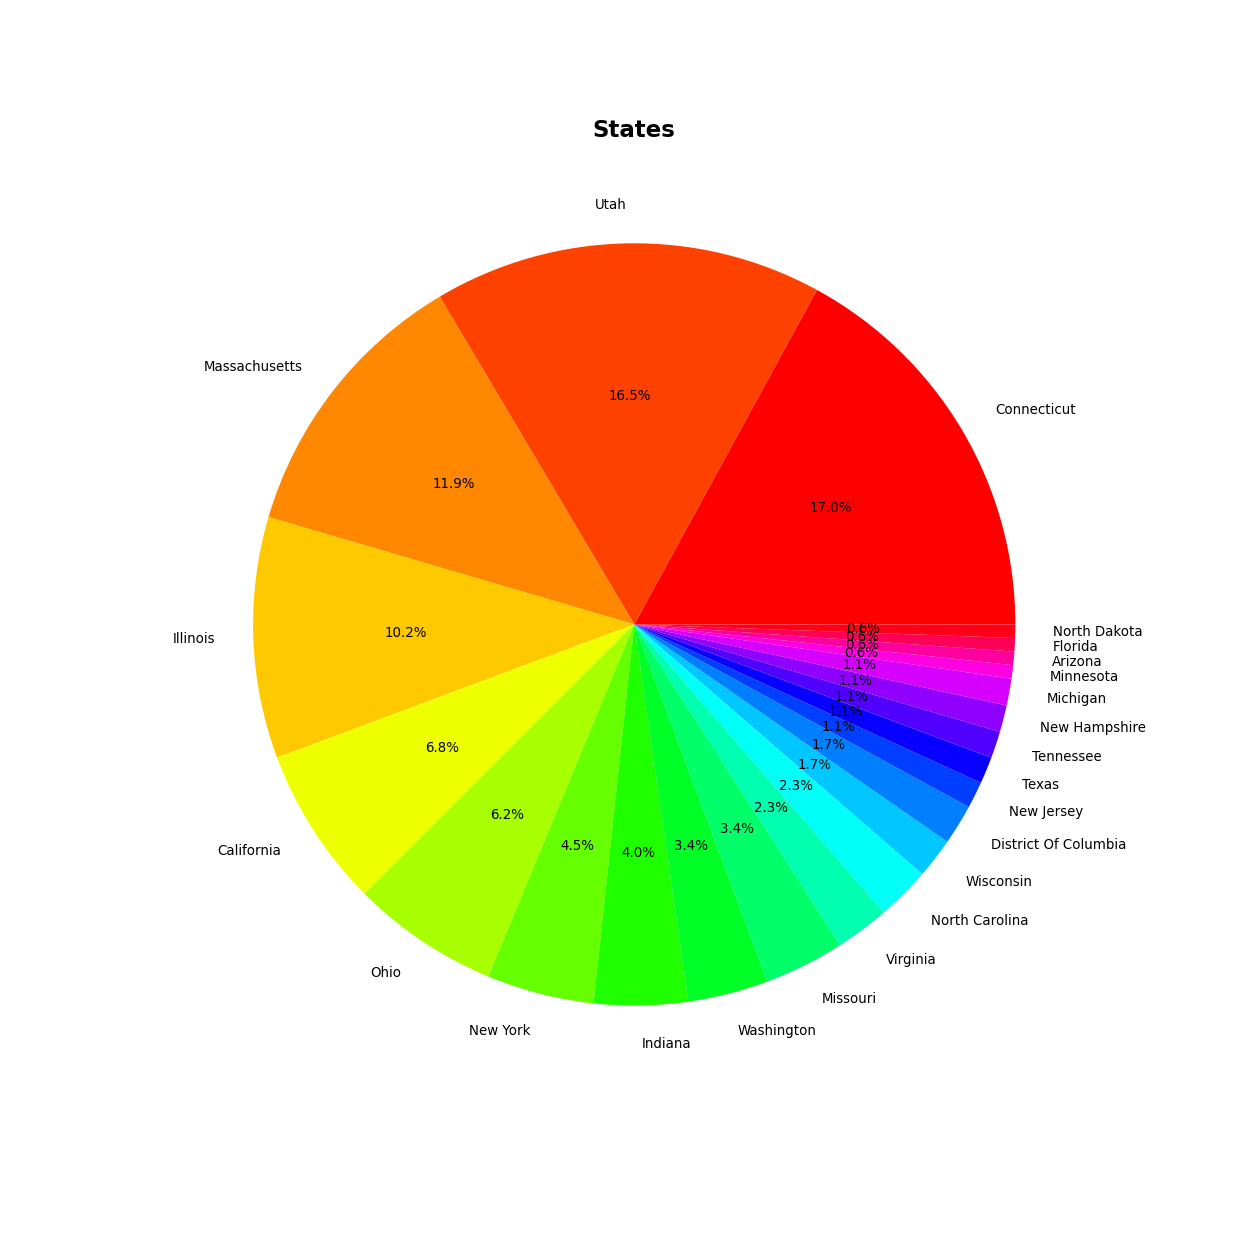

In [12]:
%matplotlib notebook  

districts_df.state.value_counts().plot(kind= 'pie', figsize= (9,9), colormap= 'hsv', fontsize= 7, autopct='%1.1f%%')
plt.title('States', fontsize= 12, fontweight= 'bold')
plt.ylabel(' ')
plt.show()

In [13]:
districts_df.locale.value_counts()

Suburb    104
Rural      33
City       29
Town       10
Name: locale, dtype: int64

<IPython.core.display.Javascript object>


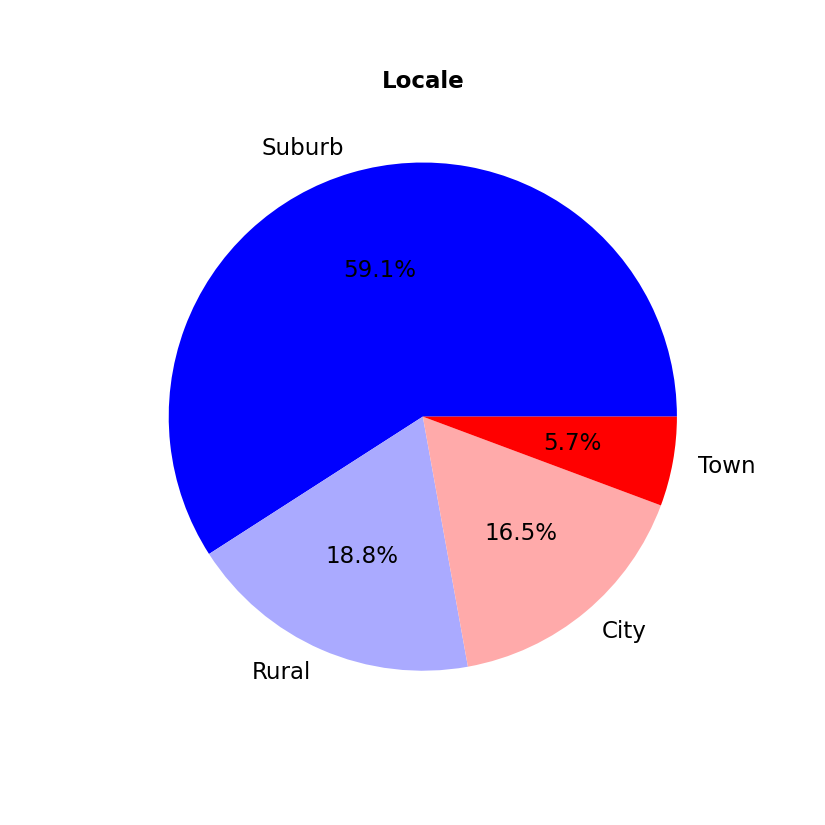

In [14]:
%matplotlib notebook  
districts_df.locale.value_counts().plot(kind= 'pie', figsize= (6,6), colormap= 'bwr', fontsize= 12, autopct='%1.1f%%')
plt.title('Locale', fontsize= 12, fontweight= "bold")
plt.ylabel(' ')
plt.show()

In [16]:
districts_df['pct_black/hispanic'].value_counts()

0%-20%      116
20%-40%      24
40%-60%      17
60%-80%      11
80%-100%      8
Name: pct_black/hispanic, dtype: int64

<IPython.core.display.Javascript object>


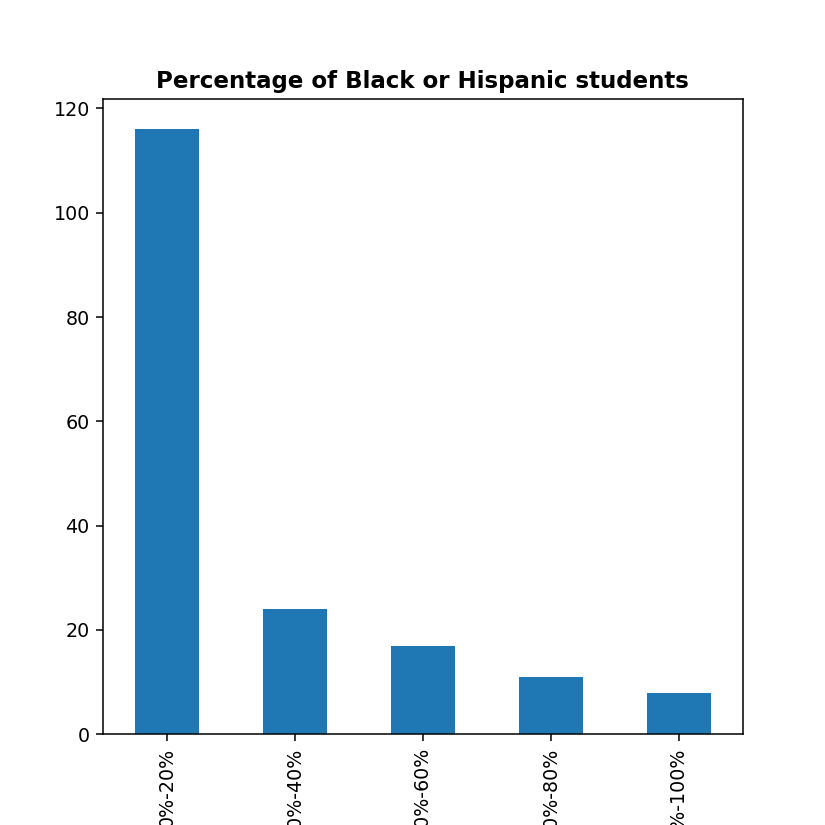

In [17]:
%matplotlib notebook  

districts_df['pct_black/hispanic'].value_counts().plot(kind= 'bar', figsize= (6,6))
plt.title('Percentage of Black or Hispanic students', fontsize= 12, fontweight= 'bold')
plt.show()

<IPython.core.display.Javascript object>


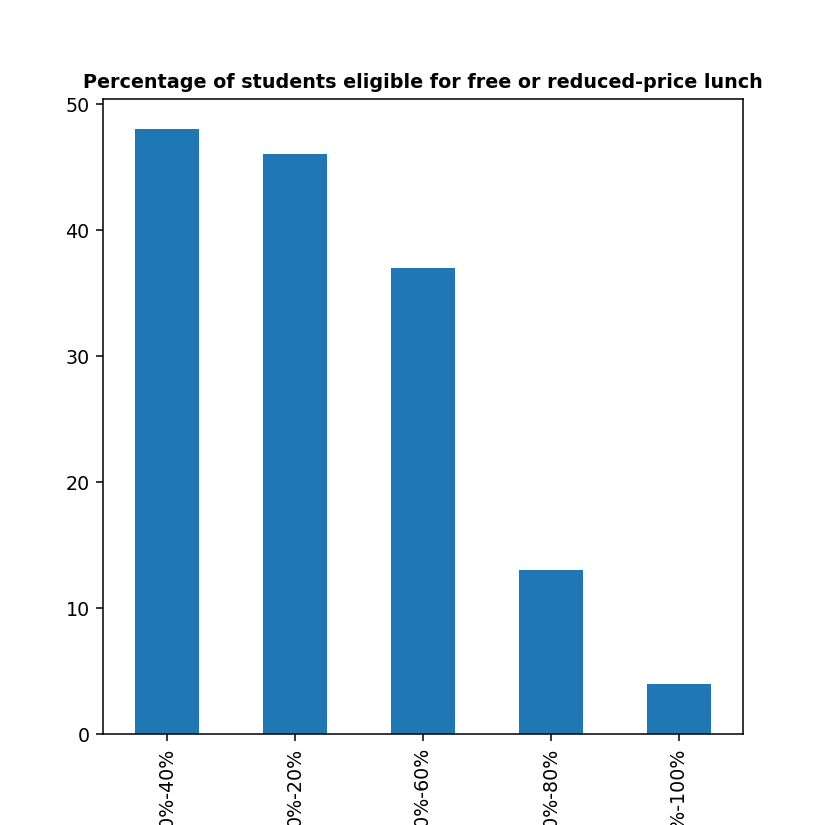

In [18]:
%matplotlib notebook  

districts_df['pct_free/reduced'].value_counts().plot(kind= 'bar', figsize= (6,6))
plt.title('Percentage of students eligible for free or reduced-price lunch', fontsize= 10, fontweight= 'bold')
plt.show()

In [20]:
districts_df.county_connections_ratio.value_counts()

18%-100%     161
100%-200%      1
Name: county_connections_ratio, dtype: int64

<IPython.core.display.Javascript object>


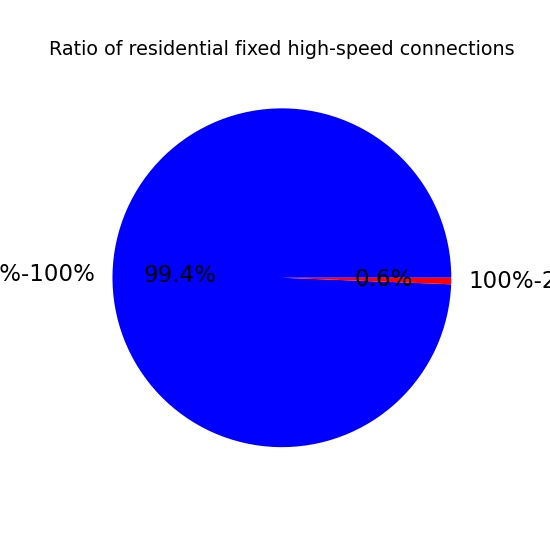

In [21]:
%matplotlib notebook  

districts_df.county_connections_ratio.value_counts().plot(kind= 'pie', figsize= (4,4), colormap= 'bwr', fontsize= 12, autopct='%1.1f%%')
plt.ylabel(' ')
plt.title('Ratio of residential fixed high-speed connections', fontsize= 10)
plt.show()

In [22]:
districts_df.pp_total_raw.value_counts()

8000-10000     30
10000-12000    17
14000-16000    15
12000-14000    15
6000-8000      13
16000-18000    13
18000-20000     8
20000-22000     2
22000-24000     2
4000-6000       2
32000-34000     1
Name: pp_total_raw, dtype: int64

<IPython.core.display.Javascript object>


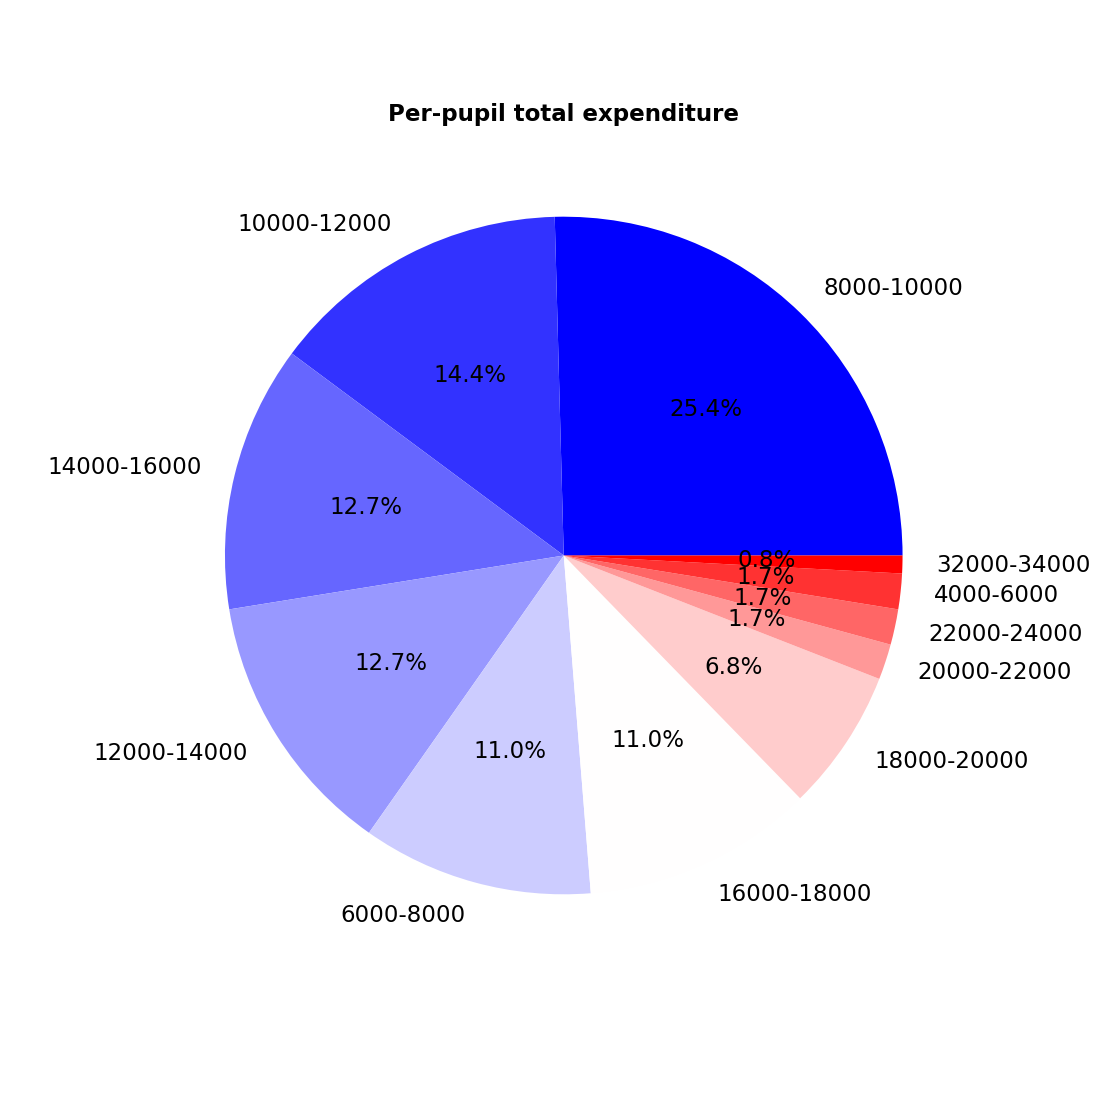

In [23]:
%matplotlib notebook  

districts_df.pp_total_raw.value_counts().plot(kind= 'pie', figsize= (8,8), colormap= 'bwr', fontsize= 12, autopct='%1.1f%%')
plt.ylabel(' ')
plt.title('Per-pupil total expenditure', fontsize= 12, fontweight= 'bold')
plt.show()

#### 2- Products dataset

In [24]:
products_df= pd.read_csv('../products_info.csv', skipinitialspace = True)
products_df.head(5)

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


- LP ID:The unique identifier of the product
- URL:Web Link to the specific product
- Product Name:Name of the specific product
- Provider/Company Name:Name of the product provider
- Sector(s):Sector of education where the product is used
- Primary Essential Function:The basic function of the product. There are two layers of labels here. Products are first labeled as one of these three categories: LC = Learning & Curriculum, CM = Classroom Management, and SDO = School & District Operations. Each of these categories have multiple sub-categories with which the products were labeled

In [25]:
products_df.shape

(372, 6)

In [26]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LP ID                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.6+ KB


In [27]:
products_df.describe(include= ['float', 'object', 'int'])

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
count,372.000000,372,372,371,352,352
unique,NaN,372,372,290,5,35
top,NaN,https://www.splashmath.com,SplashLearn,Google LLC,PreK-12,LC - Digital Learning Platforms
freq,NaN,1,1,30,170,74
mean,54565.795699,NaN,NaN,NaN,NaN,NaN
std,26247.551437,NaN,NaN,NaN,NaN,NaN
min,10533.000000,NaN,NaN,NaN,NaN,NaN
25%,30451.000000,NaN,NaN,NaN,NaN,NaN
50%,53942.500000,NaN,NaN,NaN,NaN,NaN
75%,77497.000000,NaN,NaN,NaN,NaN,NaN


- The count refers to the number (count) of records
 - Unique is the number of unique values in each column.
 - Top is the most common value in each column.
 - Freq is the frequency of the most common value (frequency of top).
 - Mean is the average of all values in columns with int or float data type.
 - std is the standard deviation which is a measure of spread that represents the degree to which the values are spread. The higher the number, the more spread the values are.
 - Min is the minimum value in each column.
 - Max is the maximum value in each column.
 - 25% is the 25% percentile and it is the value under which 25% of the data points exist.
 - 50% is the 50% percentile also known as the (median) under which 50% of the data points exist.
 - 75% is the 75% percentile under which 75% of the data points exist. 

#### Products dataframe cleaning

- change "id" column data type to string
- modify "LP ID" column name to "lp_id" to match the id column in the engagement data frame
- replace nan values
- derive categories columns from the "primary essential function" column
- derive different sectors from the "sector" column

In [28]:
# change "id" column data type to string

products_df['LP ID']= products_df['LP ID'].astype('str')
products_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LP ID                       372 non-null    object
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
dtypes: object(6)
memory usage: 17.6+ KB


In [29]:
#modify "LP ID" column name to "lp_id" 

products_df.rename(columns= {'LP ID': 'lp_id'}, inplace=True)
products_df.head(1)

,lp_id,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms


In [30]:
#replace nan values with"missing information"

print(products_df.isnull().sum())
print(products_df['Sector(s)'].value_counts())

lp_id                          0
URL                            0
Product Name                   0
Provider/Company Name          1
Sector(s)                     20
Primary Essential Function    20
dtype: int64
PreK-12                          170
PreK-12; Higher Ed; Corporate    115
PreK-12; Higher Ed                65
Corporate                          1
Higher Ed; Corporate               1
Name: Sector(s), dtype: int64


In [31]:
products_df= products_df.fillna('Missing Info')
products_df.isnull().sum()

lp_id                         0
URL                           0
Product Name                  0
Provider/Company Name         0
Sector(s)                     0
Primary Essential Function    0
dtype: int64

In [32]:
#derive categories columns from the "primary essential function" column

products_df[['Product Category1', 'Product Category2', 'Product Category3']]= products_df['Primary Essential Function'].str.split(' - ',expand=True)

products_df.head(10)

,lp_id,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,Product Category1,Product Category2,Product Category3
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms,None
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms,None
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si...",LC,"Sites, Resources & Reference",Games & Simulations
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms,LC,Digital Learning Platforms,None
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms,None
5,37600,http://www.activelylearn.com/,Actively Learn,Actively Learn,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms,None
6,18663,http://www.adaptedmind.com,AdaptedMind,GloWorld,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms,None
7,65131,http://www.amplify.com/,Amplify,"Amplify Education, Inc.",PreK-12,LC - Courseware & Textbooks,LC,Courseware & Textbooks,None
8,26491,http://www.answers.com/,Answers,Answers,PreK-12; Higher Ed,LC - Study Tools - Q&A,LC,Study Tools,Q&A
9,56441,http://www.audible.com,Audible,"Amazon.com, Inc.",PreK-12; Higher Ed; Corporate,"LC - Sites, Resources & Reference - Streaming ...",LC,"Sites, Resources & Reference",Streaming Services


In [33]:
products_df.URL.value_counts()

https://www.splashmath.com                                                                               1
http://appinventor.mit.edu/explore/                                                                      1
https://blindsidenetworks.com/                                                                           1
https://www.legendsoflearning.com                                                                        1
https://www.raz-plus.com/                                                                                1
https://conjuguemos.com/                                                                                 1
https://www.tinkercad.com/                                                                               1
http://study.com                                                                                         1
https://play.google.com/music/listen?u=0#/sulp                                                           1
https://edu.google.com/expeditions/#a

In [34]:
products_df['Product Name'].value_counts()

SplashLearn                                      1
MIT App Inventor                                 1
Blindside Networks                               1
Legends of Learning                              1
Raz-Plus                                         1
Conjuguemos                                      1
Tinkercad                                        1
Study.com                                        1
Google Play Music                                1
Google Expeditions                               1
Fluency Tutor                                    1
online-stopwatch.com                             1
Screencastify                                    1
onlinelibrary.uen.org                            1
iHeartRadio                                      1
Hooda Math                                       1
Fountas & Pinnell                                1
Kids A-Z                                         1
Epic! - Unlimited Books for Kids                 1
ClassDojo for Students         

In [35]:
products_df['Provider/Company Name'].value_counts()

Google LLC                                                 30
Microsoft                                                   6
Houghton Mifflin Harcourt                                   6
Learning A-Z                                                4
IXL Learning                                                4
Savvas Learning Company | Formerly Pearson K12 Learning     3
Scholastic Inc                                              3
Adobe Inc.                                                  3
PBS                                                         3
The College Board                                           3
ExploreLearning, LLC                                        3
Curriculum Associates                                       3
 Autodesk, Inc                                              3
McGraw-Hill PreK-12                                         3
The Wikimedia Foundation                                    2
Renaissance Learning                                        2
GitHub  

<IPython.core.display.Javascript object>


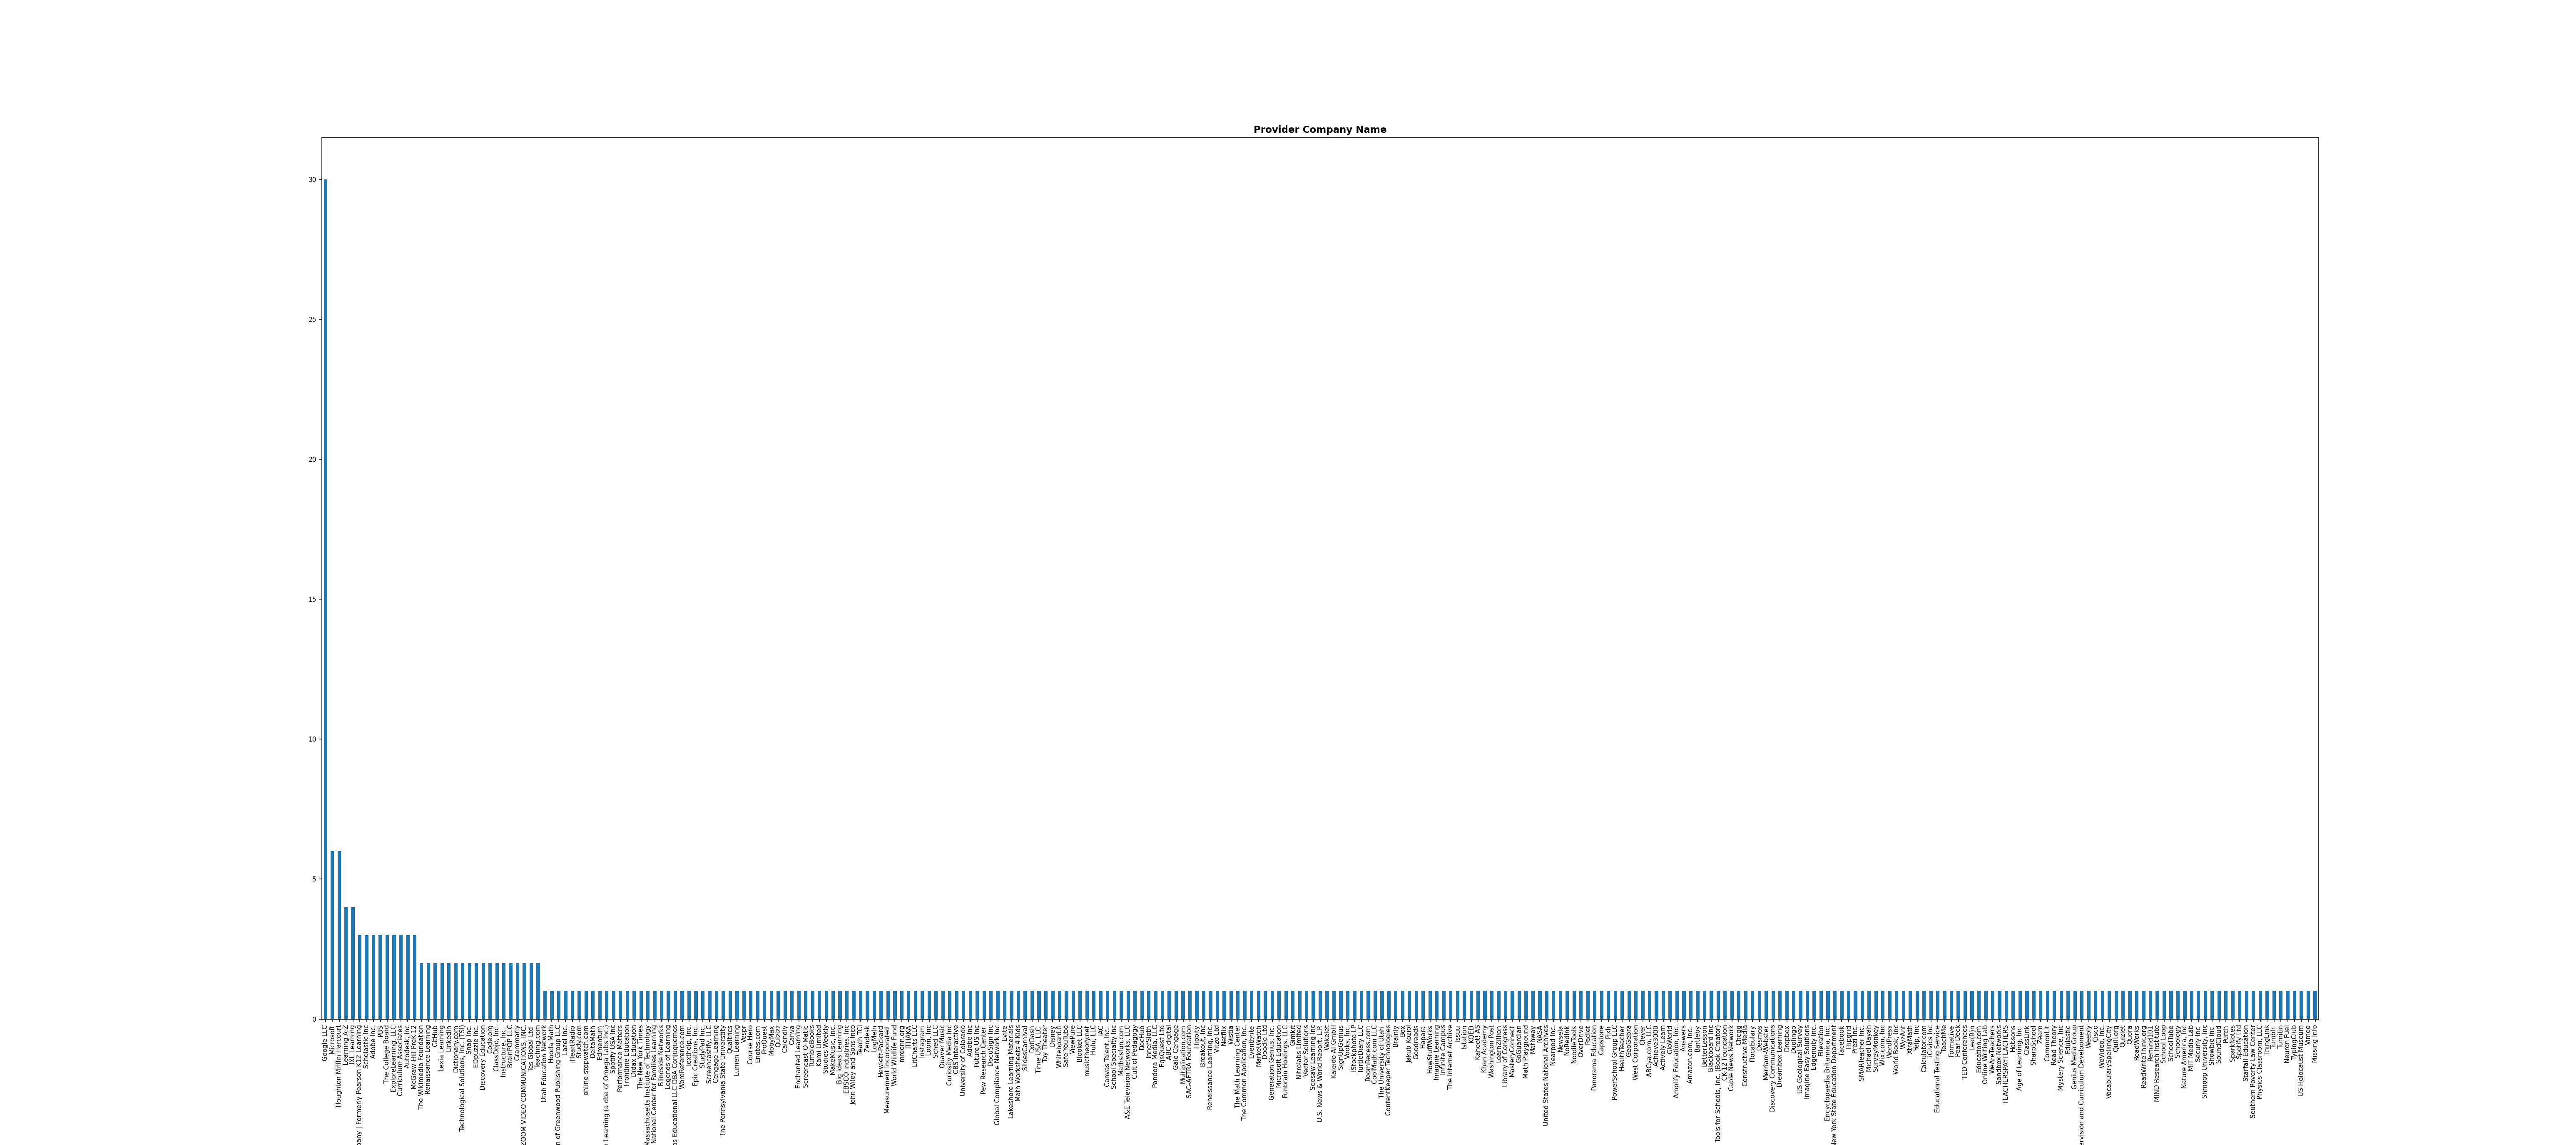

In [36]:
%matplotlib notebook  

products_df['Provider/Company Name'].value_counts().plot(kind= 'bar', figsize= (45,20), fontsize=8)
plt.ylabel(' ')
plt.title('Provider Company Name', fontsize= 12, fontweight= 'bold')


plt.show()

In [37]:
products_df['Sector(s)'].value_counts()

PreK-12                          170
PreK-12; Higher Ed; Corporate    115
PreK-12; Higher Ed                65
Missing Info                      20
Corporate                          1
Higher Ed; Corporate               1
Name: Sector(s), dtype: int64

In [38]:
#derive different sectors from the "sector" column

products_df[['Sector1','Sector2','Sector3']] = products_df['Sector(s)'].str.split(';', expand=True)
products_df.head(5)

,lp_id,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,Product Category1,Product Category2,Product Category3,Sector1,Sector2,Sector3
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms,None,PreK-12,None,None
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms,None,PreK-12,None,None
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si...",LC,"Sites, Resources & Reference",Games & Simulations,PreK-12,None,None
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms,LC,Digital Learning Platforms,None,PreK-12,Higher Ed,None
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms,None,PreK-12,None,None


<IPython.core.display.Javascript object>


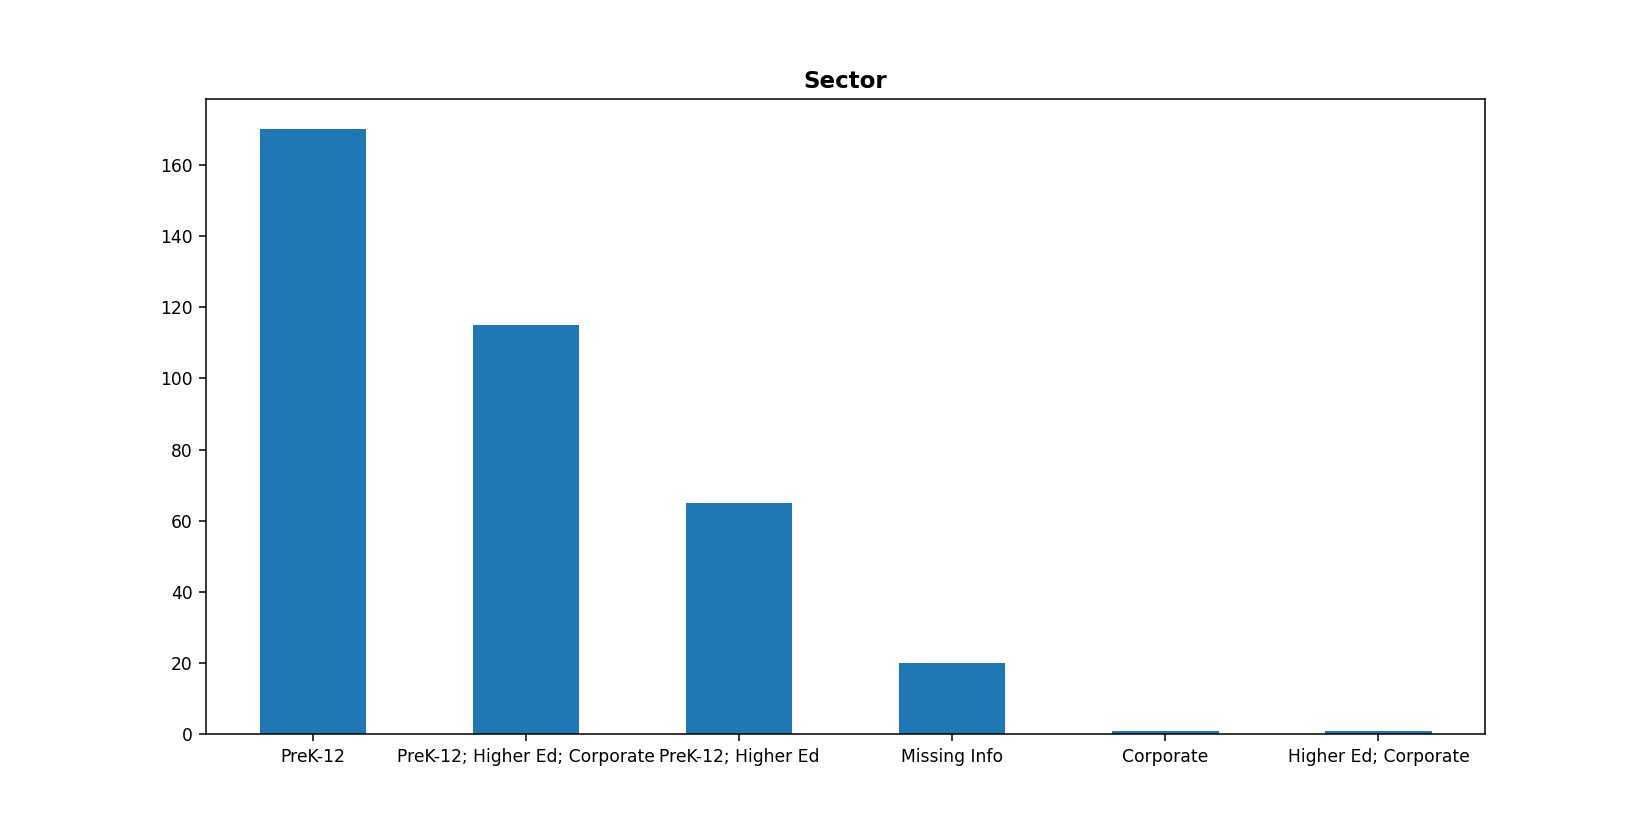

In [39]:
%matplotlib notebook  

products_df['Sector(s)'].value_counts().plot(kind= 'bar', figsize= (12,6), fontsize= 9)
plt.title('Sector', fontsize= 12, fontweight= 'bold')
plt.xticks(rotation=0)

plt.show() 

In [40]:
products_df['Primary Essential Function'].value_counts()

LC - Digital Learning Platforms                                              74
LC - Sites, Resources & Reference                                            47
LC - Content Creation & Curation                                             36
LC - Study Tools                                                             25
Missing Info                                                                 20
LC - Courseware & Textbooks                                                  18
LC - Sites, Resources & Reference - Games & Simulations                      18
LC/CM/SDO - Other                                                            16
LC - Sites, Resources & Reference - Digital Collection & Repository          15
CM - Classroom Engagement & Instruction - Classroom Management               11
LC - Sites, Resources & Reference - Streaming Services                        9
CM - Virtual Classroom - Video Conferencing & Screen Sharing                  7
LC - Study Tools - Q&A                  

<IPython.core.display.Javascript object>


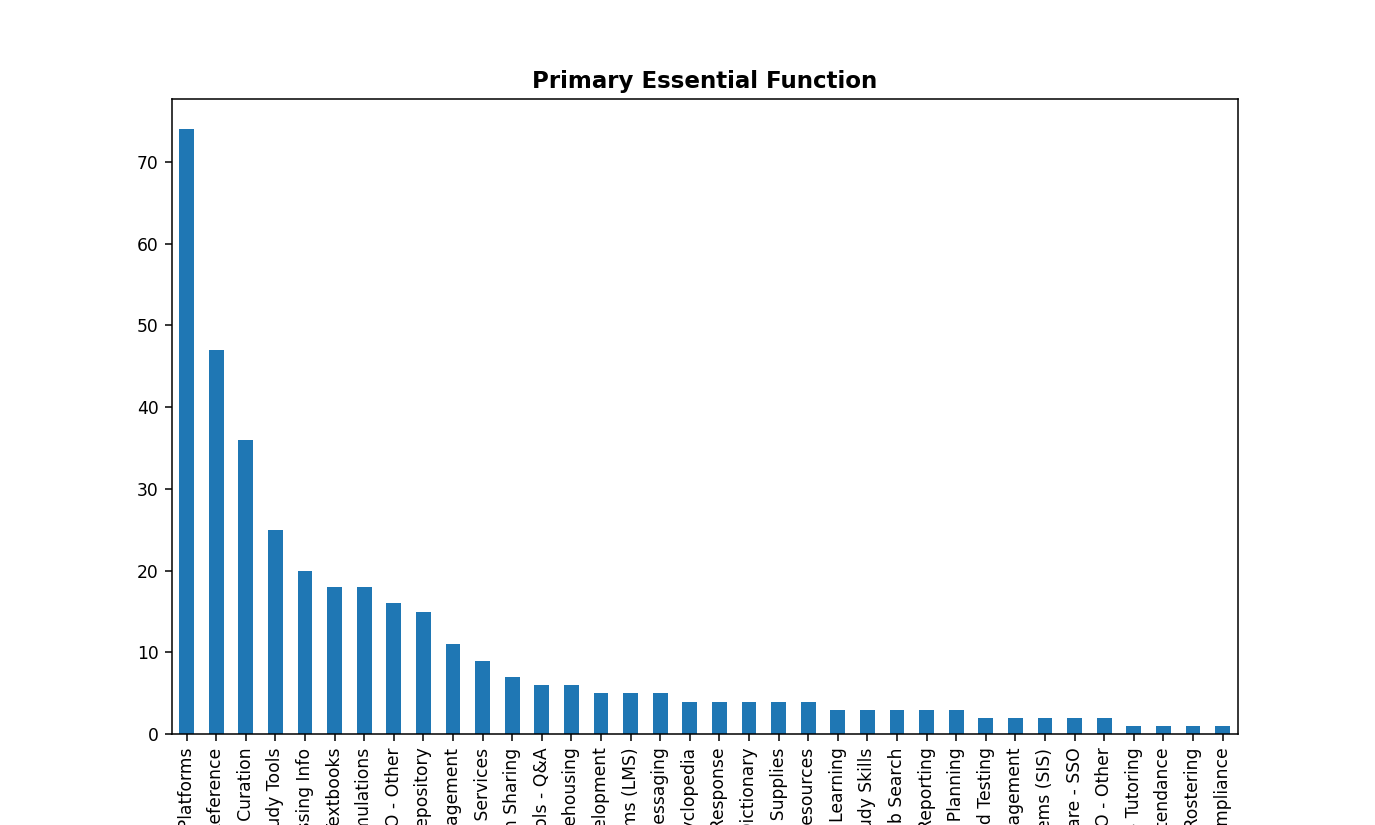

In [41]:
%matplotlib notebook  

products_df['Primary Essential Function'].value_counts().plot(kind= 'bar', figsize= (10,6), fontsize= 9)
plt.ylabel(' ')
plt.title('Primary Essential Function', fontsize= 12, fontweight= 'bold')
plt.show()

#### 3- Engagement data 

In [42]:
import glob
all_files = glob.glob("*.csv")

li = []

for filename in all_files:
    eng_df = pd.read_csv(filename, index_col=None, header=0)
    district_id = filename
    eng_df["district_id"] = district_id
    li.append(eng_df)
    
eng_df = pd.concat(li)
eng_df = eng_df.reset_index(drop=True)
eng_df.head()

,time,lp_id,pct_access,engagement_index,district_id
0,2020-01-01,93690.0,0.00,NaN,1000.csv
1,2020-01-01,17941.0,0.03,0.90,1000.csv
2,2020-01-01,65358.0,0.03,1.20,1000.csv
3,2020-01-01,98265.0,0.57,37.79,1000.csv
4,2020-01-01,59257.0,0.00,NaN,1000.csv


In [43]:
eng_df.head()
eng_df.shape

(22324190, 5)

In [44]:
eng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22324190 entries, 0 to 22324189
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   time              object 
 1   lp_id             float64
 2   pct_access        float64
 3   engagement_index  float64
 4   district_id       object 
dtypes: float64(3), object(2)
memory usage: 851.6+ MB


#### engagement data frame cleaning

- change time column data type into datetime
- change lp_id column data type to string
- check missing values and deal with them
- delete the ".csv" part from the district_id column

In [45]:
#change time column data type into datetime

eng_df['time']= pd.to_datetime(eng_df['time'])
eng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22324190 entries, 0 to 22324189
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   time              datetime64[ns]
 1   lp_id             float64       
 2   pct_access        float64       
 3   engagement_index  float64       
 4   district_id       object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 851.6+ MB


In [46]:
#change lp_id column data type to string

eng_df['lp_id']= eng_df['lp_id'].astype('str')
eng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22324190 entries, 0 to 22324189
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   time              datetime64[ns]
 1   lp_id             object        
 2   pct_access        float64       
 3   engagement_index  float64       
 4   district_id       object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 851.6+ MB


In [47]:
#check missing values and deal with them

eng_df.isnull().sum()

time                      0
lp_id                     0
pct_access            13447
engagement_index    5378409
district_id               0
dtype: int64

- we have 5378409 missing values in the "engagement_index" column and 13447 missing values in the "pct_access" column, we can search for records that have both values missing and drop them.

- this can be done by inspecting the rows that have around 40% missing values. and since we have 5 columns, and there are 2 columns only with missing values, then all the records that have 40% or more missing values will be those records that are missing both pct_access and engagement_index values.

- next, we can replace the rest of the nan values with 0


In [48]:
perc = 40.0 
min_count =  int(((100-perc)/100)*eng_df.shape[1] + 1)
eng_df = eng_df.dropna( axis=0, 
                    thresh=min_count)

eng_df.isnull().sum()

time                      0
lp_id                     0
pct_access                0
engagement_index    5364962
district_id               0
dtype: int64

In [49]:
eng_df['engagement_index']= eng_df['engagement_index'].fillna(0)
eng_df.isnull().sum()

time                0
lp_id               0
pct_access          0
engagement_index    0
district_id         0
dtype: int64

In [50]:
#delete the ".csv" part from the district_id column

eng_df['district_id'] = eng_df['district_id'].map(lambda x: x.rstrip('.csv'))
eng_df.head(5)

,time,lp_id,pct_access,engagement_index,district_id
0,2020-01-01,93690.0,0.00,0.00,1000
1,2020-01-01,17941.0,0.03,0.90,1000
2,2020-01-01,65358.0,0.03,1.20,1000
3,2020-01-01,98265.0,0.57,37.79,1000
4,2020-01-01,59257.0,0.00,0.00,1000


##### Now, we have 3 dataframes: 
- 1. districts_df
- 2. products_df
- 3. eng_df

In [51]:
print(products_df.columns)
print(districts_df.columns)
print(eng_df.columns)

Index(['lp_id', 'URL', 'Product Name', 'Provider/Company Name', 'Sector(s)',
       'Primary Essential Function', 'Product Category1', 'Product Category2',
       'Product Category3', 'Sector1', 'Sector2', 'Sector3'],
      dtype='object')
Index(['district_id', 'state', 'locale', 'pct_black/hispanic',
       'pct_free/reduced', 'county_connections_ratio', 'pp_total_raw'],
      dtype='object')
Index(['time', 'lp_id', 'pct_access', 'engagement_index', 'district_id'], dtype='object')


- First, we'll join the "districts" and "engagement" dataframes on "district_id"

In [52]:
all_df= pd.merge(districts_df, eng_df, how= 'inner', on= 'district_id')
all_df.head(3)

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw,time,lp_id,pct_access,engagement_index
0,8815,Illinois,Suburb,0%-20%,0%-20%,18%-100%,14000-16000,2020-01-27,32213.0,100.00,3000.00
1,8815,Illinois,Suburb,0%-20%,0%-20%,18%-100%,14000-16000,2020-02-25,90153.0,33.33,2666.67
2,8815,Illinois,Suburb,0%-20%,0%-20%,18%-100%,14000-16000,2020-02-25,99916.0,0.00,0.00


In [53]:
all_df.shape

(17428382, 11)

- Second, we'll join the new dataframe with the "products_df" on lp_id column

In [54]:
all_df['lp_id'] = all_df['lp_id'].map(lambda x: x.rstrip('.0'))
all_df.head(3)

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw,time,lp_id,pct_access,engagement_index
0,8815,Illinois,Suburb,0%-20%,0%-20%,18%-100%,14000-16000,2020-01-27,32213,100.00,3000.00
1,8815,Illinois,Suburb,0%-20%,0%-20%,18%-100%,14000-16000,2020-02-25,90153,33.33,2666.67
2,8815,Illinois,Suburb,0%-20%,0%-20%,18%-100%,14000-16000,2020-02-25,99916,0.00,0.00


In [55]:
final_df= pd.merge(all_df, products_df, how= 'inner', on= 'lp_id')
final_df.head(3)

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw,time,lp_id,pct_access,...,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,Product Category1,Product Category2,Product Category3,Sector1,Sector2,Sector3
0,8815,Illinois,Suburb,0%-20%,0%-20%,18%-100%,14000-16000,2020-01-27,32213,100.00,...,Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS),SDO,Learning Management Systems (LMS),None,PreK-12,Higher Ed,Corporate
1,8815,Illinois,Suburb,0%-20%,0%-20%,18%-100%,14000-16000,2020-02-26,32213,25.00,...,Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS),SDO,Learning Management Systems (LMS),None,PreK-12,Higher Ed,Corporate
2,8815,Illinois,Suburb,0%-20%,0%-20%,18%-100%,14000-16000,2020-02-27,32213,73.26,...,Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS),SDO,Learning Management Systems (LMS),None,PreK-12,Higher Ed,Corporate


In [56]:
print(final_df.shape)
print(final_df.columns)

(8273142, 22)
Index(['district_id', 'state', 'locale', 'pct_black/hispanic',
       'pct_free/reduced', 'county_connections_ratio', 'pp_total_raw', 'time',
       'lp_id', 'pct_access', 'engagement_index', 'URL', 'Product Name',
       'Provider/Company Name', 'Sector(s)', 'Primary Essential Function',
       'Product Category1', 'Product Category2', 'Product Category3',
       'Sector1', 'Sector2', 'Sector3'],
      dtype='object')


- district_id : The unique identifier of the school district
- state : The state where the district resides in
- locale : NCES locale classification that categorizes U.S. territory into four types of areas: City, Suburban, Town, and Rural. See Locale Boundaries User's Manual for more information.
- pct_black/hispanic : Percentage of students in the districts identified as Black or Hispanic based on 2018-19 NCES data
- pct_free/reduced : Percentage of students in the districts eligible for free or reduced-price lunch based on 2018-19 NCES data
- county_connections_ratio : ratio (residential fixed high-speed connections over 200 kbps in at least one direction/households) based on the county level data from FCC From 477 (December 2018 version). See FCC data for more information.
- pp_total_raw : Per-pupil total expenditure (sum of local and federal expenditure) from Edunomics Lab's National Education Resource Database on Schools (NERD) project. The expenditure data are school-by-school, and we use the median value to represent the expenditure of a given school district
- URL:Web Link to the specific product
- Product Name:Name of the specific product
- Provider/Company Name:Name of the product provider
- Sector(s):Sector of education where the product is used
- Primary Essential Function:The basic function of the product. There are two layers of labels here. Products are first labeled as one of these three categories: LC = Learning & Curriculum, CM = Classroom Management, and SDO = School & District Operations. Each of these categories have multiple sub-categories with which the products were labeled
- Time : represent the date on which the data has been extracted
- lp_id : Unique identifier of a product
- pct_access : Percentage of students in the district that have at least one page-load event of a given product on a given day
- engagement_index : Total page-load events per 1.000 students of a given product and on a given day

In [57]:
#rename columns

final_df= final_df.rename(columns= {'district_id': 'District_ID', 'state': 'State', 'locale': 'Locale', 
                          'pct_black/hispanic': 'Percentage_black/hispanic', 
                          'pct_free/reduced': 'Percentage_eligible_free', 'county_connections_ratio': 'Residential_connection'
                          , 'pp_total_raw': 'Per-pupil_expenditure', 'time': 'Time', 'lp_id': 'Product_ID', 
                          'pct_access': 'Percenatge_onepage_load', 'engagement_index': 'Engagement_index'})    


In [58]:
final_df.head(2)

,District_ID,State,Locale,Percentage_black/hispanic,Percentage_eligible_free,Residential_connection,Per-pupil_expenditure,Time,Product_ID,Percenatge_onepage_load,...,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,Product Category1,Product Category2,Product Category3,Sector1,Sector2,Sector3
0,8815,Illinois,Suburb,0%-20%,0%-20%,18%-100%,14000-16000,2020-01-27,32213,100.0,...,Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS),SDO,Learning Management Systems (LMS),None,PreK-12,Higher Ed,Corporate
1,8815,Illinois,Suburb,0%-20%,0%-20%,18%-100%,14000-16000,2020-02-26,32213,25.0,...,Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS),SDO,Learning Management Systems (LMS),None,PreK-12,Higher Ed,Corporate


In [60]:
#save the final data frame to csv file

final_df.to_csv('final.csv')